# Newton's method in $n$ dimensions

In [1]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

Here are two functions. The first one is an oblong "bowl-shaped" one made of quadratic functions.

In [2]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

def ddf(x):
    return np.array([
                     [1,0],
                     [0,5]
                     ])

The second one is a challenge problem for optimization algorithms known as [Rosenbrock's banana function](https://en.wikipedia.org/wiki/Rosenbrock_function).

In [7]:
def f(X):
    x = X[0]
    y = X[1]
    val = 100.0 * (y - x**2)**2 + (1.0 - x)**2
    return val

def df(X):
    x = X[0]
    y = X[1]
    val1 = -400.0 * (y - x**2) * x - 2 * (1 - x)
    val2 = 200.0 * (y - x**2)
    return np.array([val1, val2])

def ddf(X):
    x = X[0]
    y = X[1]
    val11 = -400.0 * (y - x**2) + 800.0 * x**2 + 2
    val12 = -400.0 * x
    val21 = -400.0 * x
    val22 = 200.0
    return np.array([[val11, val12], [val21, val22]])

Let's take a look at these functions. First in 3D:

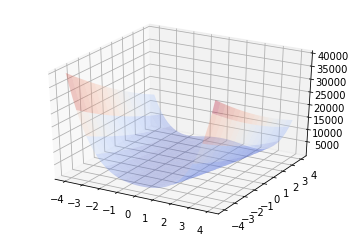

In [8]:
fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-4:4:50j,-4:4:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh,
                alpha=0.3, cmap=pt.cm.coolwarm, rstride=3, cstride=3)

Then as a "contour plot":

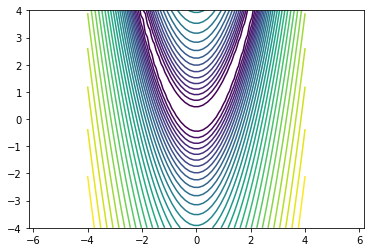

In [9]:
pt.axis("equal")
pt.contour(xmesh, ymesh, np.log(fmesh + 100), 30)

* You may need to add contours to seee more detail.
* The function is *not* symmetric about the y axis!

### Newton

First, initialize:

In [10]:
# Initialize the method

guesses = [np.array([-2, 2/5])]
costs = [f(guesses[0])]

Then evaluate this cell lots of times:

In [16]:
#clear
x = guesses[-1]
s = la.solve(ddf(x), -df(x))
next_guess = x + s
costs.append(f(next_guess))
print(f(next_guess), next_guess)

guesses.append(next_guess)

0.0 [ 1.  1.]


Here's some plotting code to see what's going on:

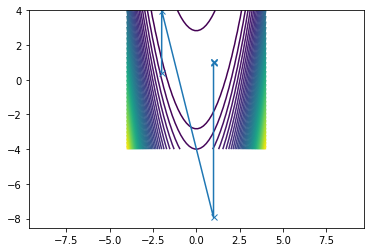

In [17]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

In [ ]:
costs = np.array(costs)
pt.semilogy(costs)

# Testing derivatives against finite difference approximations

Test at point $x$:

In [ ]:
x = np.array([1, 0])
f(x)

First derivatives:

In [ ]:
df(x)

In [ ]:
sopt.approx_fprime(x, f, 1e-8)

Second derivatives:

In [ ]:
ddf(x)

In [ ]:
sopt.approx_fprime(x, lambda x: df(x)[0], 1e-8)

In [ ]:
sopt.approx_fprime(x, lambda x: df(x)[1], 1e-8)